In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uw-ee596-cv/Kaggle_eval_set.csv
/kaggle/input/uw-ee596-cv/sample_predictions.csv
/kaggle/input/fashionmnist-train/fashion-mnist_train.csv


In [2]:
# Loading the dataset.
train_df = pd.read_csv("/kaggle/input/fashionmnist-train/fashion-mnist_train.csv")
test_df = pd.read_csv("/kaggle/input/uw-ee596-cv/Kaggle_eval_set.csv", index_col=0)
train_df.head()
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,serial_no
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [3]:
#Remove Serial_no column from Test Dataset and Add a label column to Test Dataset
test_df.drop('serial_no', axis=1, inplace=True)
test_df['label'] = 0
display(train_df)
display(test_df)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision.utils import make_grid
from torch.utils.data import random_split

import matplotlib.pyplot as plt

In [5]:
#Define functions to separate images pixel values and labels
class FashionMNIST(Dataset):
    def __init__(self,  df, root_dir,transform=None):
        self.df = df
        self.transform = transform
        self.root_dir = root_dir
        self.labels = df.label.values
        self.images = df.iloc[:, 1:].values.astype('uint8').reshape(-1, 28, 28)
        
    def __len__(self):
        return len(self.df)    
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        img = Image.fromarray(self.images[idx])
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

In [6]:
#Import dataset to code
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
IMAGENET_MEAN = np.array([0.456])
IMAGENET_STD = np.array([0.224])
DATA_DIR = "/kaggle/input/fashionmnist-train/"

In [7]:
#Import dataset to code with transforms to convert them into tensors
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)])
dataset = FashionMNIST(train_df, DATA_DIR, transform=transform)
test_dataset = FashionMNIST(test_df, DATA_DIR, transform=transform)

In [8]:
#Taking a part of Train dataset for Validation dataset 
val_size = 10000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
#Taking train, validation and test datasets in batches
batch_size=64
dataloader = {
    'train': torch.utils.data.DataLoader(
        dataset=train_ds, batch_size=batch_size, shuffle=True, num_workers=2
    ),
    'val': torch.utils.data.DataLoader(
        dataset=val_ds, batch_size=batch_size, shuffle=False, num_workers=2
    ),
}
dataset_size = {'train': train_size, 'val': val_size}
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [10]:
# Function to move data and model to a chosen device.    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Defining Class to move data to selected device as batches.
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [11]:
class FashionMnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=3, stride=1, padding=1), #output 28 X 28 X 32
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 12 x 12
            nn.Conv2d(256, 512, kernel_size=3, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 32 x 12 x 12

#             nn.Conv2d(64, 128, kernel_size=3, stride=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.Conv2d(128, 128, kernel_size=3, stride=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 128 x 6 x 6

            nn.Flatten(), 
            nn.Linear(4608*4, 256*4),
            nn.Linear(256*4, 84),
            nn.Linear(84, 10),
            nn.LogSoftmax(dim=1))
        
    def forward(self, xb):
        return self.network(xb)

In [12]:
# Importing a pre-trained data
from torchvision import models
model = FashionMnistModel()
model

FashionMnistModel(
  (network): Sequential(
    (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=18432, out_features=1024, bias=True)
    (10): Linear(in_features=1024, out_features=84, bias=True)
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): LogSoftmax(dim=1)
  )
)

In [13]:
#Change first and last layers to train our dataset.
# def change_layers(model):
#     model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
#     model.fc = nn.Linear(2048, 10, bias=True)
#     return model
# model = change_layers(model)
# model

In [14]:
#Train model function
from tqdm.notebook import tqdm
def train_model(
    model: torch.nn.Module,
    criterion: torch.nn.Module,
    optimizer: torch.nn.Module,
    sheduler: torch.nn.Module,
    epochs: int = 9
) -> (torch.nn.Module, dict):
    
    losses = {'train': [], 'val': []}
    accuracies = {'train': [], 'val': []}
    best_model_weights = model.state_dict()
    best_accuracy = 0.
    progress = tqdm(range(epochs), desc='Epoch:')
    
    for epoch in progress:
        for phase in ['train', 'val']:
            loss_accum = 0.
            corr_accum = 0
            model.train(mode=(phase == 'train'))
            
            for inputs, labels in tqdm(dataloader[phase], desc=f'Phase {phase}:'):
                #Add inputs to device
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)
                
                #Train
                if phase == 'train':
                    #Forward
                    optimizer.zero_grad()
                    outp = model(inputs)
                    loss = criterion(outp, labels)
                    #Backward
                    loss.backward()
                    optimizer.step()
                #Validate
                else:
                    with torch.no_grad():
                        outp = model(inputs)
                        loss = criterion(outp, labels)
                
                #Calculate and combine predictions and losses
                preds = torch.argmax(outp, -1)
                loss_accum += loss.item()
                corr_accum += (preds == labels.data).sum()

            if phase == 'train':
                sheduler.step()
            
            #List of losses and accuaracies is calculated
            epoch_loss = loss_accum / dataset_size[phase]
            epoch_accuracy = corr_accum / dataset_size[phase]
            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_accuracy)
            progress.set_description('loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_accuracy))
            #Take the model with best accuracy always
            if phase == 'val' and epoch_accuracy > best_accuracy:
                best_accuracy = epoch_accuracy
                best_model_weights = model.state_dict()
    
    model.load_state_dict(best_model_weights)
    return model, losses, accuracies

In [15]:
for param in model.parameters(): 
    param.requires_grad = True

#Model Hyperparameters
model.to(DEVICE) 
loss = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) 
sheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
#Train Model
model, losses, accuracies = train_model(model, loss, optimizer, sheduler)

Epoch::   0%|          | 0/9 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

Phase train::   0%|          | 0/782 [00:00<?, ?it/s]

Phase val::   0%|          | 0/157 [00:00<?, ?it/s]

In [16]:
#Print all losses and accuracies
print(losses['train'])
print(losses['val'])
print(accuracies['train'])
print(accuracies['val'])

[0.007222777227908373, 0.00498729936376214, 0.004459512046426535, 0.0041174945452809334, 0.003821610868051648, 0.003651281330101192, 0.003395127197429538, 0.002442483370453119, 0.002305276234857738]
[0.006058030188083648, 0.004838462013751268, 0.005605314304679632, 0.004070166698843241, 0.004241986674070358, 0.004479252782464027, 0.0039690570551902055, 0.0033031778641045093, 0.0033567064948379992]
[tensor(0.8404, device='cuda:0'), tensor(0.8857, device='cuda:0'), tensor(0.8983, device='cuda:0'), tensor(0.9056, device='cuda:0'), tensor(0.9119, device='cuda:0'), tensor(0.9176, device='cuda:0'), tensor(0.9219, device='cuda:0'), tensor(0.9456, device='cuda:0'), tensor(0.9486, device='cuda:0')]
[tensor(0.8612, device='cuda:0'), tensor(0.8894, device='cuda:0'), tensor(0.8755, device='cuda:0'), tensor(0.9079, device='cuda:0'), tensor(0.9040, device='cuda:0'), tensor(0.9021, device='cuda:0'), tensor(0.9125, device='cuda:0'), tensor(0.9271, device='cuda:0'), tensor(0.9252, device='cuda:0')]


In [17]:
#Function for Prediction
@torch.no_grad()
def predict_dl(dl, model):
    torch.cuda.empty_cache()
    batch_probs = []
    for xb, _ in dl:
        probs = model(xb)
        batch_probs.append(probs.cpu().detach())
    batch_probs = torch.cat(batch_probs)
    return [x.argmax(dim=0).item() for x in batch_probs]

In [18]:
#Load test dataset onto device and get predictions for all data in it
test_loader = DeviceDataLoader(test_loader, DEVICE)
test_preds = predict_dl(test_loader, model)

In [19]:
print(test_preds)

[0, 1, 2, 2, 3, 6, 8, 6, 5, 0, 3, 2, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1, 5, 7, 7, 8, 1, 0, 9, 8, 0, 8, 2, 0, 4, 2, 2, 0, 3, 3, 2, 3, 2, 4, 9, 3, 0, 9, 9, 4, 0, 3, 4, 5, 4, 6, 1, 1, 0, 9, 5, 2, 7, 3, 2, 6, 5, 7, 1, 6, 1, 0, 9, 8, 1, 2, 4, 8, 9, 4, 1, 6, 3, 6, 2, 2, 2, 6, 4, 7, 7, 3, 9, 2, 9, 2, 8, 2, 3, 8, 2, 7, 5, 5, 3, 2, 7, 5, 0, 2, 7, 4, 0, 5, 6, 4, 7, 0, 8, 5, 0, 3, 1, 5, 9, 4, 9, 6, 4, 4, 6, 4, 3, 3, 3, 2, 2, 6, 0, 0, 1, 3, 4, 3, 3, 1, 9, 3, 3, 3, 9, 5, 6, 7, 7, 3, 6, 4, 0, 8, 7, 2, 2, 8, 9, 0, 6, 4, 4, 5, 7, 9, 7, 1, 3, 9, 1, 5, 5, 6, 0, 7, 4, 9, 1, 6, 0, 0, 6, 4, 0, 9, 0, 4, 4, 5, 5, 8, 6, 2, 1, 9, 4, 4, 7, 1, 9, 5, 9, 6, 2, 8, 5, 7, 9, 3, 2, 4, 5, 7, 8, 1, 9, 5, 3, 2, 9, 7, 4, 0, 9, 2, 1, 5, 7, 9, 0, 2, 4, 5, 3, 3, 8, 1, 6, 4, 4, 8, 6, 9, 8, 3, 3, 2, 4, 2, 2, 9, 3, 9, 2, 8, 6, 8, 8, 2, 7, 2, 5, 5, 9, 5, 8, 6, 4, 8, 3, 8, 3, 1, 4, 2, 2, 1, 8, 1, 3, 3, 4, 1, 7, 0, 5, 2, 0, 9, 6, 2, 7, 4, 7, 7, 1, 6, 6, 3, 7, 8, 7, 0, 9, 2, 0, 2, 5, 0, 8, 5, 8, 7, 7, 6, 1, 2, 9, 

In [20]:
#Read sample predictions csv file and add the predicted labels for test dataset to it
submission_df = pd.read_csv("/kaggle/input/uw-ee596-cv/sample_predictions.csv")
submission_df['labels'] = test_preds
submission_df.to_csv('submission.csv',index=False)

In [21]:
#Load validation dataset onto device and get predictions for all data in it
val_loader = DeviceDataLoader(dataloader['val'], DEVICE)
val_preds = predict_dl(val_loader, model)

In [22]:
#Get true labels for validation dataset from validation data tensor 
val_true_label = np.empty([10000,1])
i = 0
for inputs, labels in dataloader['val']:
    for label in np.array(labels):
        val_true_label[i] = label
        i = i+1
val_true_label = val_true_label.astype(int)

In [23]:
#Function to calculate all metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
def metrics(y_true, y_pred, labels):
  # y_true are the true labels given, and y_pred are the ones predicted by the model.
  # Show the Confusion matrix, F1score, precision, recall and accuracy score for the given predictions.
  print("Total Accuracy:   {}".format(accuracy_score(y_true, y_pred)))
  print("Total Precision:  {}".format(precision_score(y_true, y_pred, average='macro')))
  print("Total Recall:     {}".format(recall_score(y_true, y_pred, average='macro')))
  print("Total F1 Score:   {}".format(f1_score(y_true, y_pred, average='macro')))
  print("Confusion Matrix:")
  print(confusion_matrix(y_true, y_pred))
  print("Classification Report:")
  print(classification_report(y_true, y_pred, labels=labels))

In [24]:
#Calculate and print all result metrics
labels_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
labels_list = [0,1,2,3,4,5,6,7,8,9]
metrics(val_true_label, val_preds, labels_list)

Total Accuracy:   0.9254
Total Precision:  0.9258002533602745
Total Recall:     0.9253001782463202
Total F1 Score:   0.9253758171204988
Confusion Matrix:
[[ 865    0   17   32    2    0   84    0    3    0]
 [   2  988    0   13    6    0    1    0    1    0]
 [  23    1  884    8   45    1   57    0    1    0]
 [  13    3    2  929   20    0   20    0    2    0]
 [   3    0   30   29  867    0   56    0    0    0]
 [   0    0    0    0    0  980    0    5    2    0]
 [  82    0   35   27   33    0  812    0    3    0]
 [   0    0    0    0    0    8    0  974    2   26]
 [   2    0    0    1    2    3    3    1 1019    0]
 [   0    0    0    0    0   11    0   24    1  936]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1003
           1       1.00      0.98      0.99      1011
           2       0.91      0.87      0.89      1020
           3       0.89      0.94      0.92       989
           4       0.

In [25]:
#Function to print images from validation dataset 
def print_images(dl, j):
    i = 1
    for xb, _ in dl:
        for batch in range(64):
            if i == j:
                xb = xb.cpu().numpy()[batch]
                xb = xb * IMAGENET_STD + IMAGENET_MEAN
                xb = np.squeeze(xb)
                return xb
            i+=1

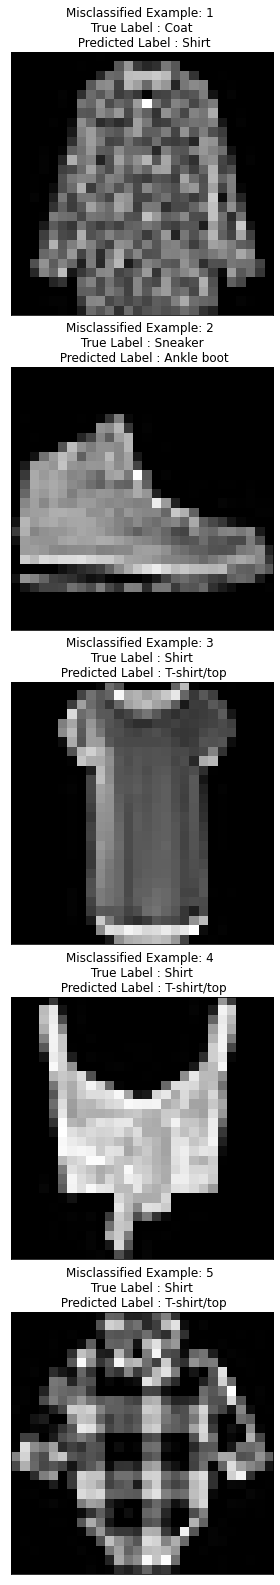

In [26]:
#Show 5 examples of misclassified images from Validation model
labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
fig, axarr = plt.subplots(5, 1, figsize=(28, 28))
plt.xticks([]) 
i = 0
j = 0
for true_label, pred_label in zip(val_true_label,val_preds):
    if true_label != pred_label:
        misclassified_image = print_images(val_loader, i+1)
        axarr[j].set_title("Misclassified Example: {} \n True Label : {} \n Predicted Label : {}".format(j+1,labels_dict[int(true_label)],labels_dict[pred_label]))
        axarr[j].get_xaxis().set_ticks([])
        axarr[j].get_yaxis().set_ticks([])
        axarr[j].imshow(misclassified_image, cmap='gray')
        j = j + 1
        if j>4:
            break
    i = i+1